In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('mnist.npz')

In [3]:
X_train_raw = data['x_train']
y_train = data['y_train']
X_test_raw = data['x_test']
y_test = data['y_test']
data.close()


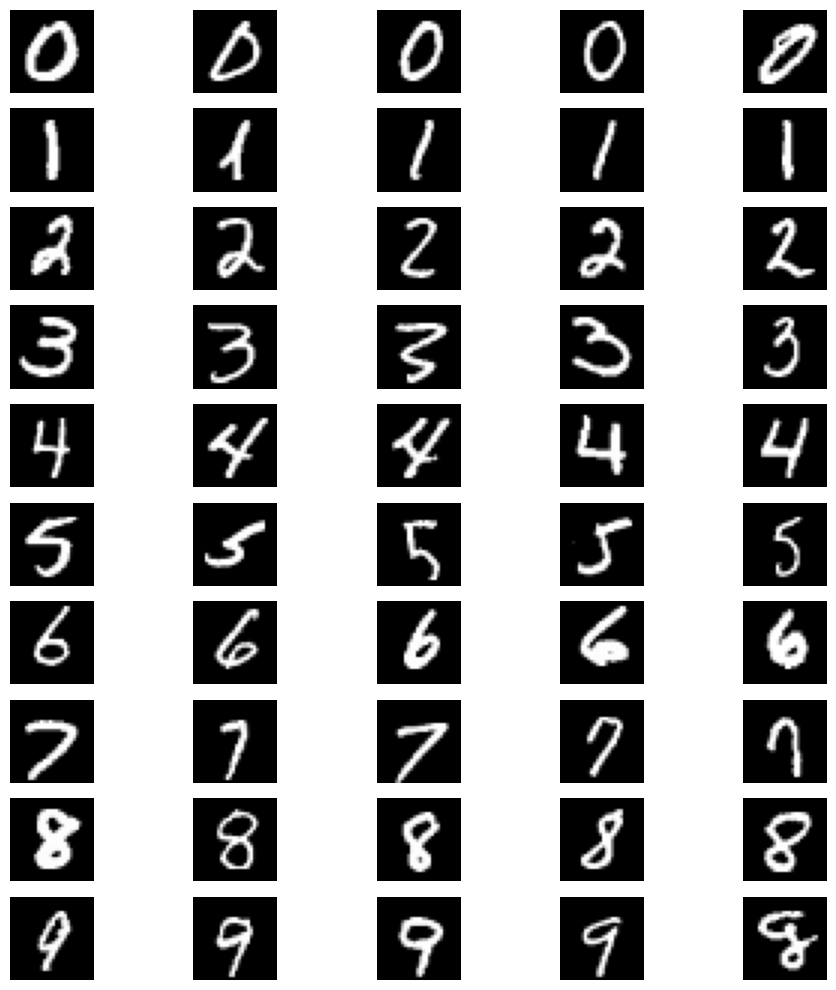

In [4]:
fig, axes = plt.subplots(10, 5, figsize=(10, 10))
for i in range(10): # Number of classes is 10
    indexes = np.flatnonzero(y_train == i)
    indexes = np.random.choice(indexes, 5, replace=False)
    for j, index in enumerate(indexes):
        axes[i, j].imshow(X_train_raw[index], cmap='gray')
        axes[i, j].axis('off')

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
X_train = X_train_raw.reshape((X_train_raw.shape[0], -1))
X_test = X_test_raw.reshape((X_test_raw.shape[0], -1))
# print(X_train, X_test)

In [6]:
# Calculating prior probs
class_priors = {digit: np.mean(y_train == digit) for digit in range(10)}
print(class_priors)

{0: 0.09871666666666666, 1: 0.11236666666666667, 2: 0.0993, 3: 0.10218333333333333, 4: 0.09736666666666667, 5: 0.09035, 6: 0.09863333333333334, 7: 0.10441666666666667, 8: 0.09751666666666667, 9: 0.09915}


In [7]:
# Regularisation as the covariance matrices are singular

# lambda_constant = 1e-6
# lambda_identity_matrix = lambda_constant * np.eye(X_train.shape[1])

mean_vectors = []
covariance_matrices = []
for digit in range(10):
    class_subset = X_train[y_train == digit]
    mean_vectors.append(np.mean(class_subset, axis=0))
    covariance_matrices.append(np.cov(class_subset, rowvar=False))

vec_means = np.array(mean_vectors)
vec_sigmas = np.array(covariance_matrices)
length = len(vec_means)
# print(mean_vectors)
# print(covariance_matrices)

In [14]:
def gi(x, vec_means, vec_sigmas, prior_prob):
    discriminant_values = []
    for i in range(len(vec_means)):
        cur_det = np.linalg.det(vec_sigmas[i])
        if cur_det == 0:
            cur_det = 100
        pseudo_inv = np.linalg.pinv(vec_sigmas[i])
        X_central = x - vec_means[i]

        # print("\nsum = ", np.sum(X_central.dot(pseudo_inv) * X_central, axis = 1), "\ndim = ", np.sum(X_central.dot(pseudo_inv) * X_central, axis = 1).shape)

        # first_term =
        discriminant_values.append((-0.5 * np.sum(X_central.dot(pseudo_inv) * X_central, axis = 1)) + (0.5 * np.log(cur_det)) + np.log(prior_prob[i]))

    return np.argmax(discriminant_values, axis = 0)
        # first_term = np.dot(np.dot(x.T, vec_sigmas), x)
        # second_term = 2 * np.dot(np.dot(vec_means.T, vec_sigmas), x)
        # third_term = np.dot(np.dot(vec_means.T, vec_sigmas), vec_means)


In [15]:
test = gi(X_test, vec_means, vec_sigmas, class_priors)
accuracy = np.mean(test == y_test)
print("Overall Accuracy : ", accuracy*100, "\n")
print("Classwise Accuracy : ")

class_wise_accuracy = {}
for class_label in range(10):
    class_indices = y_test == class_label
    class_accuracy = np.mean(test[class_indices] == y_test[class_indices])
    class_wise_accuracy[class_label] = class_accuracy

for idx, out in class_wise_accuracy.items():
    print(f"Class {idx} = {out * 100:.2f}%")



sum =  [7.22175211e+03 1.37748547e+06 8.53759751e+02 ... 7.55375486e+03
 7.86670165e+03 4.15462935e+04] 
dim =  (784,)

sum =  [9.45435931e+04 7.32082955e+05 9.61159093e+01 ... 1.82177772e+04
 6.74800293e+06 1.00302656e+08] 
dim =  (784,)

sum =  [1.83355977e+04 5.47147637e+02 3.57012506e+02 ... 2.87106743e+04
 1.73999965e+06 9.91047184e+03] 
dim =  (784,)

sum =  [5.05410446e+03 6.03825209e+05 6.25438520e+02 ... 8.98915241e+02
 6.13377514e+06 1.81732034e+04] 
dim =  (784,)

sum =  [2.56974603e+03 1.94901911e+05 3.04712118e+02 ... 3.09457140e+02
 2.94058454e+05 3.61059607e+08] 
dim =  (784,)

sum =  [2.53294032e+03 5.77064799e+04 6.81912060e+02 ... 1.07644855e+03
 5.82584407e+02 1.96771805e+06] 
dim =  (784,)

sum =  [250969.86176526 267676.25044996    714.82745243 ...  90556.10713622
 184580.6569951     684.41244849] 
dim =  (784,)

sum =  [1.69931649e+02 8.41658680e+06 2.08146360e+03 ... 6.08866327e+02
 9.24982842e+03 3.62933877e+04] 
dim =  (784,)

sum =  [ 33761.31752336 189620.32